In [1]:
import numpy as np
import pandas as pd
# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# To Convert Categorical To Num into our model
from sklearn.preprocessing import LabelEncoder
# For Train and Test
from sklearn.model_selection import train_test_split
# The Model
from sklearn.ensemble import RandomForestRegressor
# Model evaluate
from sklearn.metrics import mean_absolute_percentage_error, r2_score

## Data Collection

In [2]:
# After TRIM 
df = pd.read_csv('villasaqar.csv')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
df.head()

,Column1,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,squarePrice
0,0,شرقية,5,4.0,5,20.0,1,0,1,1,1,1,1,1,1,300,0,0,0,0,0,0,عكاظ,جنوب الرياض,1050001.0,3501.000000
1,1,غربية,4,3.0,5,20.0,1,0,1,1,1,1,1,1,0,540,2,1,1,0,0,0,المهدية,غرب الرياض,3000001.0,5556.555556
2,2,جنوبية شرقية,7,2.0,5,15.0,1,31,1,0,1,1,1,1,0,875,0,1,0,0,0,0,الشفا,جنوب الرياض,2000001.0,2286.714286
3,3,غربية,7,3.0,5,15.0,1,3,0,1,1,1,0,1,1,200,0,1,0,1,0,0,ظهرة لبن,غرب الرياض,894001.0,4471.000000
4,4,شمالية,4,2.0,4,25.0,1,0,1,1,1,1,1,1,0,400,3,1,1,1,0,0,قرطبة,شرق الرياض,3500001.0,8751.000000


In [4]:
df.describe().round()

,Column1,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,apartments,maidRoom,elevator,furnihsed,pool,basement,price,squarePrice
count,46109.0,46109.0,45010.0,46109.0,45923.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46107.0,46107.0
mean,25915.0,5.0,2.0,5.0,18.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,380.0,1.0,1.0,0.0,0.0,0.0,0.0,2353204.0,6100.0
std,14992.0,1.0,1.0,1.0,4.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,282.0,1.0,0.0,0.0,0.0,0.0,0.0,2793694.0,4508.0
min,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,1081.0,4.0
25%,12931.0,4.0,2.0,4.0,15.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,270.0,0.0,1.0,0.0,0.0,0.0,0.0,1180001.0,3888.0
50%,25832.0,5.0,2.0,5.0,20.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,312.0,0.0,1.0,0.0,0.0,0.0,0.0,1600001.0,5001.0
75%,38924.0,5.0,3.0,5.0,20.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,400.0,1.0,1.0,0.0,0.0,0.0,0.0,2600001.0,7610.0
max,51844.0,7.0,7.0,5.0,100.0,1.0,35.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10000.0,30.0,1.0,1.0,1.0,1.0,1.0,100000001.0,136146.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46109 entries, 0 to 46108
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Column1        46109 non-null  int64  
 1   front          46109 non-null  object 
 2   rooms          46109 non-null  int64  
 3   lounges        45010 non-null  float64
 4   bathrooms      46109 non-null  int64  
 5   streetWidth    45923 non-null  float64
 6   stairs         46109 non-null  int64  
 7   propertyAge    46109 non-null  int64  
 8   driverRoom     46109 non-null  int64  
 9   tent           46109 non-null  int64  
 10  patio          46109 non-null  int64  
 11  kitchen        46109 non-null  int64  
 12  outdoorRoom    46109 non-null  int64  
 13  garage         46109 non-null  int64  
 14  duplex         46109 non-null  int64  
 15  space          46109 non-null  int64  
 16  apartments     46109 non-null  int64  
 17  maidRoom       46109 non-null  int64  
 18  elevat

# Data Cleaning & Prprocessing

- Remove null values
- Change the data type for some columns
- Remove the outliers
- Remove the columns that will not be needed

In [6]:
df.isnull().sum()

Column1             0
front               0
rooms               0
lounges          1099
bathrooms           0
streetWidth       186
stairs              0
propertyAge         0
driverRoom          0
tent                0
patio               0
kitchen             0
outdoorRoom         0
garage              0
duplex              0
space               0
apartments          0
maidRoom            0
elevator            0
furnihsed           0
pool                0
basement            0
neighbourhood       0
location            0
price               2
squarePrice         2
dtype: int64

In [7]:
df = df.dropna()

<Axes: >

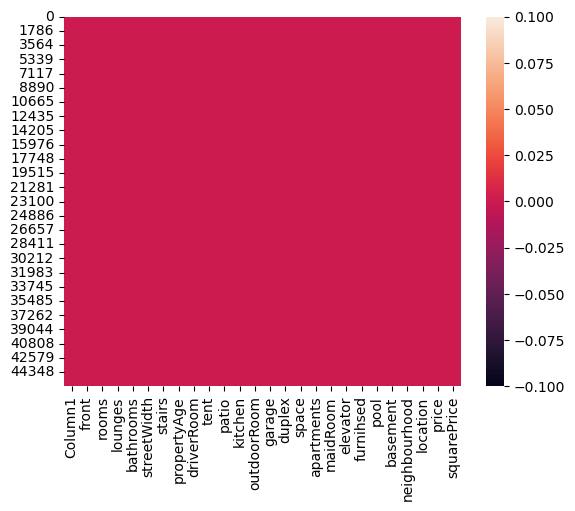

In [8]:
sns.heatmap(df.isnull())

In [38]:
# Convert the categorical var to float  

replace=lambda x:str(x).replace('+','')
df['apartments']=df['apartments'].apply(replace).astype(float)
replace=lambda x:str(x).replace('+','')
df['bathrooms']=df['bathrooms'].apply(replace).astype(float)
replace=lambda x:str(x).replace('+','')
df['lounges']=df['lounges'].apply(replace).astype(float)

df['apartments'] = df['apartments'].astype(int)
df['bathrooms'] = df['bathrooms'].astype(int)
df['lounges'] = df['lounges'].astype(int)

binary_features = ['stairs','driverRoom', 'tent', 'patio', 'kitchen', 'outdoorRoom', 'garage', 'duplex', 'maidRoom', 'elevator', 'furnihsed', 'pool', 'basement']

# Convert binary features to binary values (0 or 1)
df[binary_features] = df[binary_features].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44840 entries, 0 to 46108
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Column1        44840 non-null  int64  
 1   front          44840 non-null  object 
 2   rooms          44840 non-null  int64  
 3   lounges        44840 non-null  float64
 4   bathrooms      44840 non-null  int64  
 5   streetWidth    44840 non-null  float64
 6   stairs         44840 non-null  int64  
 7   propertyAge    44840 non-null  int64  
 8   driverRoom     44840 non-null  int64  
 9   tent           44840 non-null  int64  
 10  patio          44840 non-null  int64  
 11  kitchen        44840 non-null  int64  
 12  outdoorRoom    44840 non-null  int64  
 13  garage         44840 non-null  int64  
 14  duplex         44840 non-null  int64  
 15  space          44840 non-null  int64  
 16  apartments     44840 non-null  int64  
 17  maidRoom       44840 non-null  int64  
 18  elevat

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_22136\1447368976.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


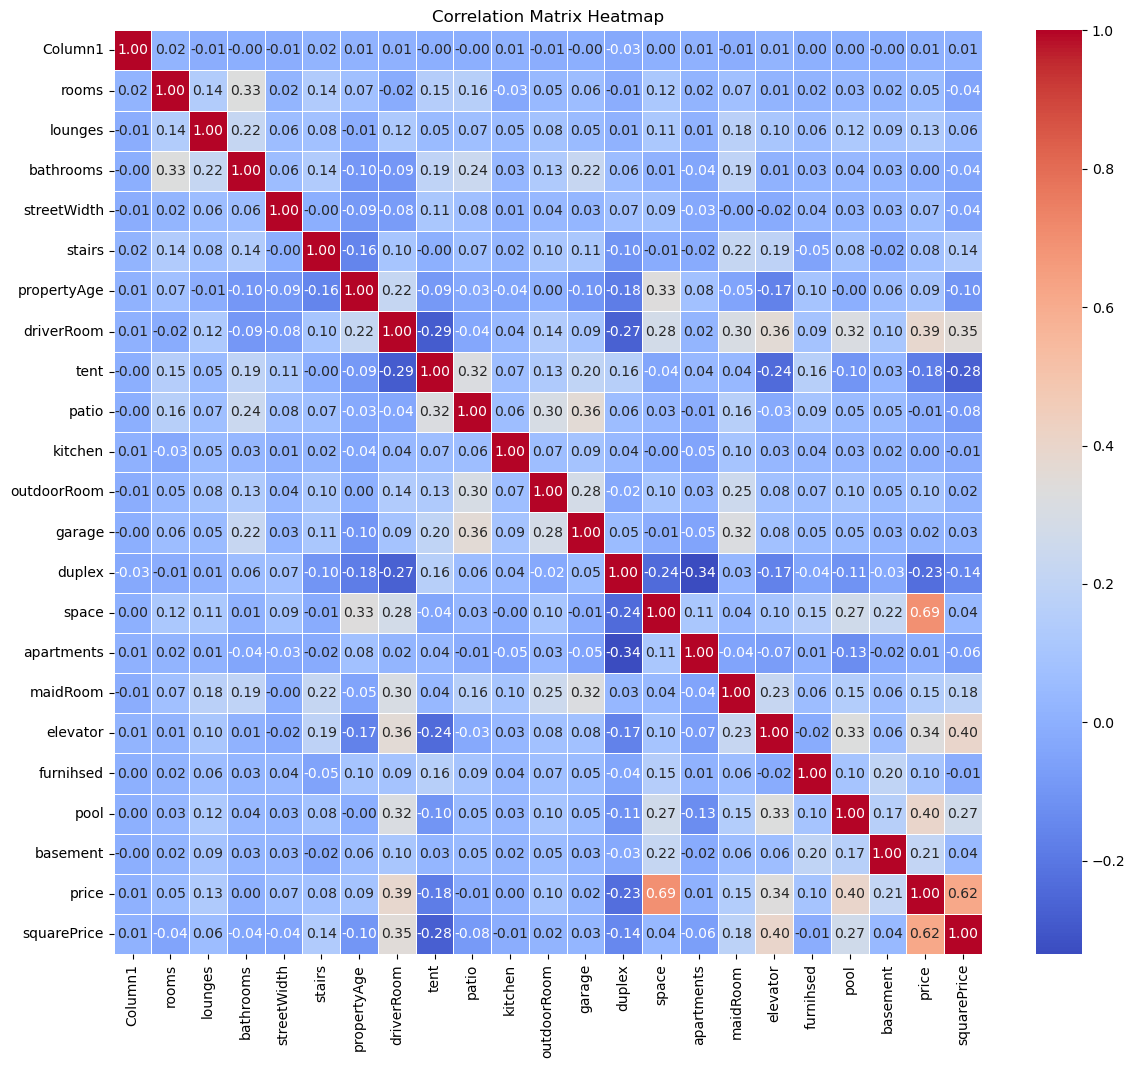

In [16]:
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [40]:
# To help us remove the outliers

df = df[(df['streetWidth'] >= 10) & df['streetWidth'] <= 30]
df = df[df['space'] >= 200]
df = df[df['apartments'] <= 10]
df = df[(df['price'] >= 250000) & (df['price'] <= 10000000)]

In [41]:
# Remove the columns that will not use 
df = df.drop(['front', 'squarePrice'], axis = 1)
df = df.drop(['Column1'], axis = 'columns')

In [42]:
df.describe().round()

,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,apartments,maidRoom,elevator,furnihsed,pool,basement,price
count,44101.0,44101.0,44101.0,44101.0,44101.0,44101.0,44101.0,44101.0,44101.0,44101.0,44101.0,44101.0,44101.0,44101.0,44101.0,44101.0,44101.0,44101.0,44101.0,44101.0,44101.0
mean,5.0,2.0,5.0,18.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,361.0,1.0,1.0,0.0,0.0,0.0,0.0,2104804.0
std,1.0,1.0,1.0,4.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170.0,1.0,0.0,0.0,0.0,0.0,0.0,1409219.0
min,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,250001.0
25%,4.0,2.0,4.0,15.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,270.0,0.0,1.0,0.0,0.0,0.0,0.0,1170001.0
50%,5.0,2.0,5.0,20.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,312.0,0.0,1.0,0.0,0.0,0.0,0.0,1600001.0
75%,5.0,3.0,5.0,20.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,390.0,1.0,1.0,0.0,0.0,0.0,0.0,2550001.0
max,7.0,7.0,5.0,100.0,1.0,35.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4550.0,10.0,1.0,1.0,1.0,1.0,1.0,9900001.0


## Model Traning

In [43]:
# Before Training we have to convert Categorical columns to Num
label = LabelEncoder()
df['location'] = label.fit_transform(df['location'])
df['neighbourhood'] = label.fit_transform(df['neighbourhood'])

In [44]:
df.head()

,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price
0,5,4,5,20.0,1,0,1,1,1,1,1,1,1,300,0,0,0,0,0,0,140,0,1050001.0
1,4,3,5,20.0,1,0,1,1,1,1,1,1,0,540,2,1,1,0,0,0,99,3,3000001.0
2,7,2,5,15.0,1,31,1,0,1,1,1,1,0,875,0,1,0,0,0,0,50,0,2000001.0
3,7,3,5,15.0,1,3,0,1,1,1,0,1,1,200,0,1,0,1,0,0,134,3,894001.0
4,4,2,4,25.0,1,0,1,1,1,1,1,1,0,400,3,1,1,1,0,0,144,1,3500001.0


#### Spilt Data

In [45]:
# Now we split the data to train the model
X = df.drop(['price'], axis=1)
y = df[['price']]

#### Train & Test 

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Implement the Random Forest algorthim 

In [47]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_14844\3176955887.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


## Model Evalution

In [48]:
rf_mae = mean_absolute_percentage_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest:")
print("MAPE:", rf_mae)
print("R-squared:", rf_r2)

Random Forest:
MAPE: 0.06497329951099215
R-squared: 0.9485140410547813


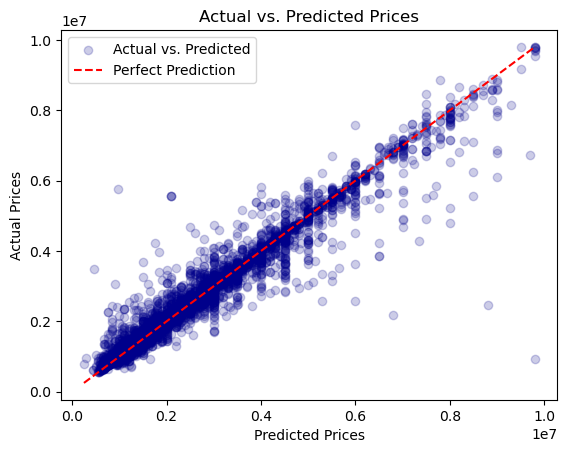

In [53]:
plt.scatter(y_test['price'], rf_predictions, alpha=0.2, color="DarkBlue", label='Actual vs. Predicted')

# Plot a diagonal line for reference
plt.plot([min(y_test['price']), max(y_test['price'])], [min(y_test['price']), max(y_test['price'])], linestyle='--', color='red', label='Perfect Prediction')

# Labels and title
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')

# Show a legend
plt.legend()

# Show the plot
plt.show()

In [21]:
# Assuming you have the actual prices (y_test) and predicted prices (rf_predictions) available
df = {'Actual Price': y_test.values.reshape(-1), 'Predicted Price': rf_predictions}
comparison_df = pd.DataFrame(df).reset_index().round()
comparison_df.sample(5)

,index,Actual Price,Predicted Price
6449,6449,2200001.0,2153801.0
2793,2793,2250001.0,2060801.0
2120,2120,890001.0,987301.0
3606,3606,1400001.0,1419351.0
1574,1574,680001.0,661624.0
